**task:** A function that generates n three dimensional points and computes the distance and optimal transport plan between the two distributions
- **Geom loss** is designed to come up with the optimal transport distance, without explicitly coming up with the transport plan

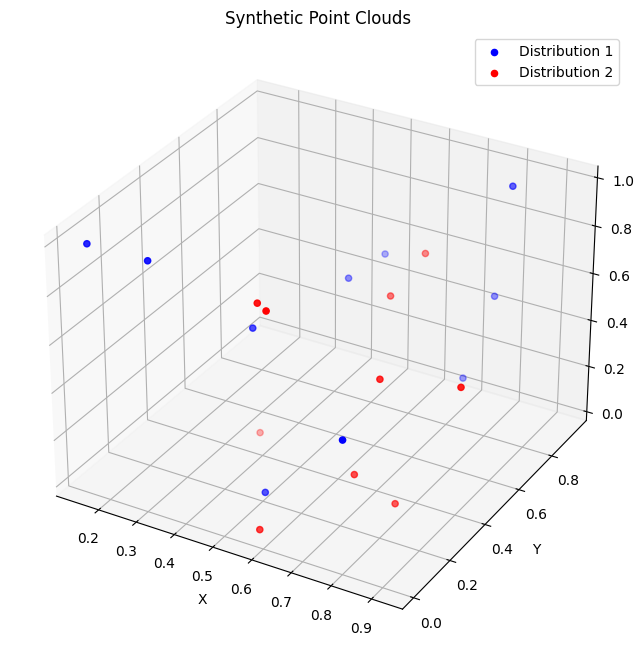

Wasserstein Distance: 0.09383296963310706
Gradient for Distribution 1:
[[-0.01579406  0.05637165 -0.0074275 ]
 [ 0.00699578 -0.02133405  0.03339287]
 [-0.0316709  -0.0013422   0.00704215]
 [ 0.01413685  0.01763865  0.02303156]
 [-0.03727812 -0.01311528  0.01691713]
 [-0.01844866  0.03727906 -0.01454858]
 [-0.00716263  0.0561778   0.00970318]
 [-0.02486519 -0.00948134  0.014717  ]
 [-0.00531317  0.01363681  0.00278995]
 [ 0.00198096  0.03632691  0.0365359 ]]
Gradient for Distribution 2:
[[-0.00691614  0.02134659 -0.03367777]
 [ 0.03196637  0.0111706  -0.01580849]
 [-0.01414185 -0.017672   -0.02305376]
 [-0.00568672 -0.03873291 -0.04166015]
 [ 0.00531311 -0.01363679 -0.00279005]
 [ 0.03563412  0.013391   -0.01695048]
 [ 0.03148431  0.00085996 -0.00691231]
 [ 0.01830951 -0.0358722   0.01438034]
 [ 0.00775287 -0.05636001 -0.00967388]
 [ 0.01590214 -0.05647581  0.00737231]]


In [ ]:
import numpy as np
import torch
from geomloss import SamplesLoss
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorboardX import SummaryWriter

def generate_points(n):
    # Generating n 3D points for two distributions
    distribution_1 = np.random.rand(n, 3)
    distribution_2 = np.random.rand(n, 3)

    return distribution_1, distribution_2

def compute_distance(distribution_1, distribution_2):
    # Converting NumPy arrays to PyTorch tensors
    distribution_1_tensor = torch.tensor(distribution_1, requires_grad=True)
    distribution_2_tensor = torch.tensor(distribution_2, requires_grad=True)

    # Using geomloss for Wasserstein distance
    loss = SamplesLoss("sinkhorn", p=2)
    distance = loss(distribution_1_tensor, distribution_2_tensor)

    # Compute gradient with respect to input tensors
    gradient_1 = torch.autograd.grad(distance, distribution_1_tensor)[0].detach().numpy()
    gradient_2 = torch.autograd.grad(distance, distribution_2_tensor)[0].detach().numpy()

    return distance.item(), gradient_1, gradient_2

# Example usage
n = 10
points_1, points_2 = generate_points(n)

# Plot the synthetic point clouds
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_1[:, 0], points_1[:, 1], points_1[:, 2], c='blue', label='Distribution 1')
ax.scatter(points_2[:, 0], points_2[:, 1], points_2[:, 2], c='red', label='Distribution 2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Synthetic Point Clouds')
plt.show()

distance, gradient_1, gradient_2 = compute_distance(points_1, points_2)

print(f"Wasserstein Distance: {distance}")
print("Gradient for Distribution 1:")
print(gradient_1)
print("Gradient for Distribution 2:")
print(gradient_2)


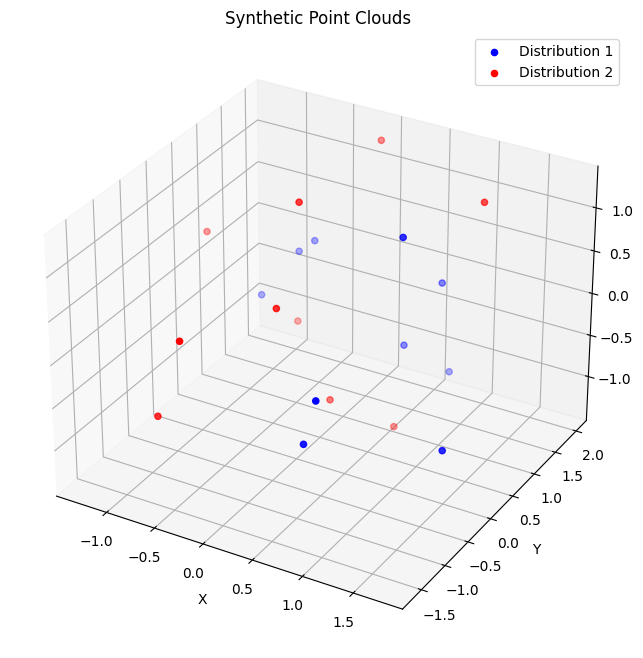

In [ ]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_points(n):
    # Generating n 3D points for two distributions
    distribution_1 = np.random.randn(n, 3)
    distribution_2 = np.random.randn(n, 3)

    return distribution_1, distribution_2

def compute_distance(distribution_1, distribution_2):
    # Using POT for Wasserstein distance
    # Assuming the distributions are 3D point clouds
    cost_matrix = ot.dist(distribution_1, distribution_2)
    transport_plan = ot.emd([], [], cost_matrix)

    # Compute Wasserstein distance
    distance = np.sum(cost_matrix * transport_plan)

    return distance


# Example usage
n = 10
points_1, points_2 = generate_points(n)

# Plot the synthetic point clouds
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_1[:, 0], points_1[:, 1], points_1[:, 2], c='blue', label='Distribution 1')
ax.scatter(points_2[:, 0], points_2[:, 1], points_2[:, 2], c='red', label='Distribution 2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Synthetic Point Clouds')
plt.show()

# Compute Wasserstein distance and gradients
distance= compute_distance(points_1, points_2)

print(f"Wasserstein Distance: {distance}")



For 2/12/24 Meeting
- Compute the ot plan, change the number of points in the point cloud and measure the amount of time it takes to execute
    - What is the corresponding distance between the two point clouds

In [57]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def generate_points(n):
    # Generating n 3D points for two distributions
    distribution_1 = np.random.randn(n, 3)
    distribution_2 = np.random.randn(n, 3)

    return distribution_1, distribution_2

def compute_distance_emd(distribution_1, distribution_2):
    # Using POT for Wasserstein distance
    # Assuming the distributions are 3D point clouds
    cost_matrix = ot.dist(distribution_1, distribution_2)
    transport_plan = ot.emd([], [], cost_matrix)

    # Compute Wasserstein distance
    distance = np.sum(cost_matrix * transport_plan)

    return distance

def compute_distance_sinkhorn(distribution_1, distribution_2):
    # Using POT for Wasserstein distance
    # Assuming the distributions are 3D point clouds
    cost_matrix = ot.dist(distribution_1, distribution_2)
    transport_plan = ot.sinkhorn([], [], cost_matrix, reg=1e-5)

    # Compute Wasserstein distance
    distance = np.sum(cost_matrix * transport_plan)

    return distance


n_values = [10, 100, 250, 500, 750, 1000]
emd_times = []
sinkhorn_times = []
emd_distance = []

print(f"reg = 1e-5")
for n in n_values:
  points_1, points_2 = generate_points(n)
  print(f"Number of points: {n}")

  start_time = time.time()
  distance_emd = compute_distance_emd(points_1, points_2)
  end_time = time.time()
  execution_time_emd = end_time - start_time

  start_time = time.time()
  distance_sinkhorn = compute_distance_sinkhorn(points_1, points_2)
  end_time = time.time()
  execution_time_sinkhorn = end_time - start_time

  print(f"EMD Time: {execution_time_emd} seconds, Wasserstein Distance: {distance_emd}")
  print(f"Sinkhorn Time: {execution_time_sinkhorn} seconds, Wasserstein Distance: {distance_sinkhorn}")
  print("\n")

  emd_times.append(execution_time_emd)
  sinkhorn_times.append(execution_time_sinkhorn)
  emd_distance.append(distance_emd)



reg = 1e-5
Number of points: 10
EMD Time: 0.007470846176147461 seconds, Wasserstein Distance: 1.7543396476812783
Sinkhorn Time: 0.002312183380126953 seconds, Wasserstein Distance: 0.0


Number of points: 100
EMD Time: 0.004478931427001953 seconds, Wasserstein Distance: 0.585466796907963
Sinkhorn Time: 0.011548042297363281 seconds, Wasserstein Distance: 0.0


Number of points: 250
EMD Time: 0.00996708869934082 seconds, Wasserstein Distance: 0.2832879893987475
Sinkhorn Time: 0.0021240711212158203 seconds, Wasserstein Distance: 9.613398043727273e-95


Number of points: 500
EMD Time: 0.05364799499511719 seconds, Wasserstein Distance: 0.24536646475439405
Sinkhorn Time: 0.023807048797607422 seconds, Wasserstein Distance: 8.058379654360761e-29


Number of points: 750


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: divide by zero encountered in divide
  v = b / KtransposeU
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:506: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: overflow encountered in divide
  v = b / KtransposeU


EMD Time: 0.13521265983581543 seconds, Wasserstein Distance: 0.1721975558741946
Sinkhorn Time: 0.06818008422851562 seconds, Wasserstein Distance: 3.0468506104768714e-12


Number of points: 1000
EMD Time: 0.2625291347503662 seconds, Wasserstein Distance: 0.1637426863907991
Sinkhorn Time: 0.03476095199584961 seconds, Wasserstein Distance: 1.1686204926237175e-18




Comparing EMD and Sinkhorn when reg = 1e-5 for Sinkhorn

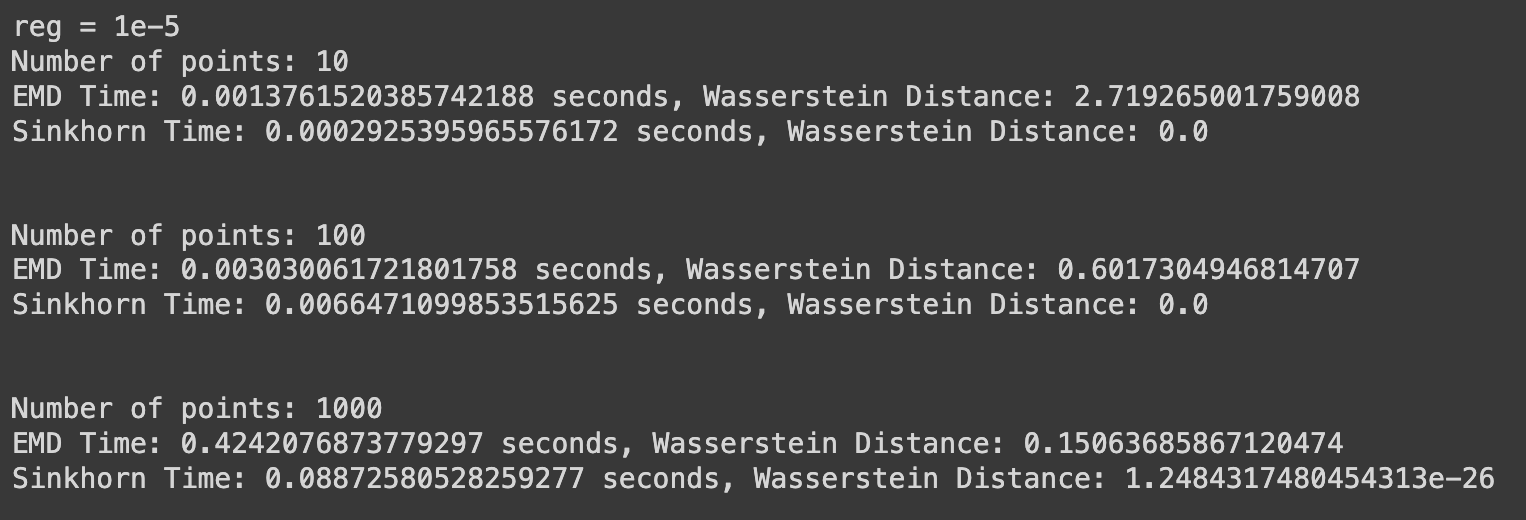

Comparing EMD and Sinkhorn when reg = 1e-3 for Sinkhorn
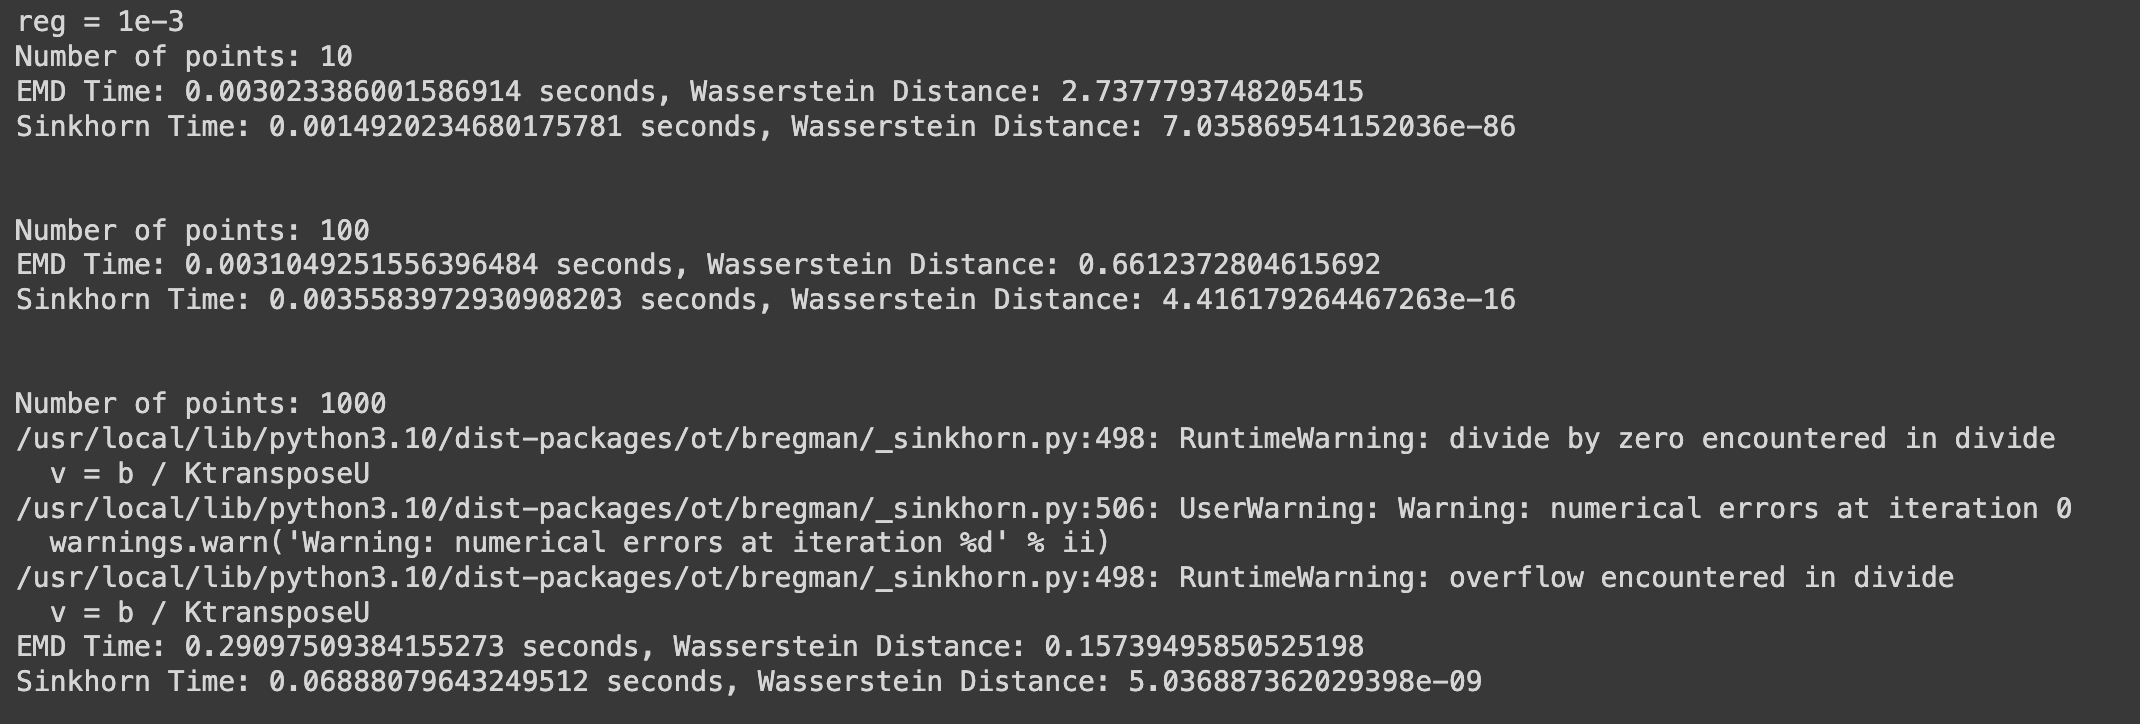

Comparing EMD and Sinkhorn when reg = 0.1 for Sinkhorn
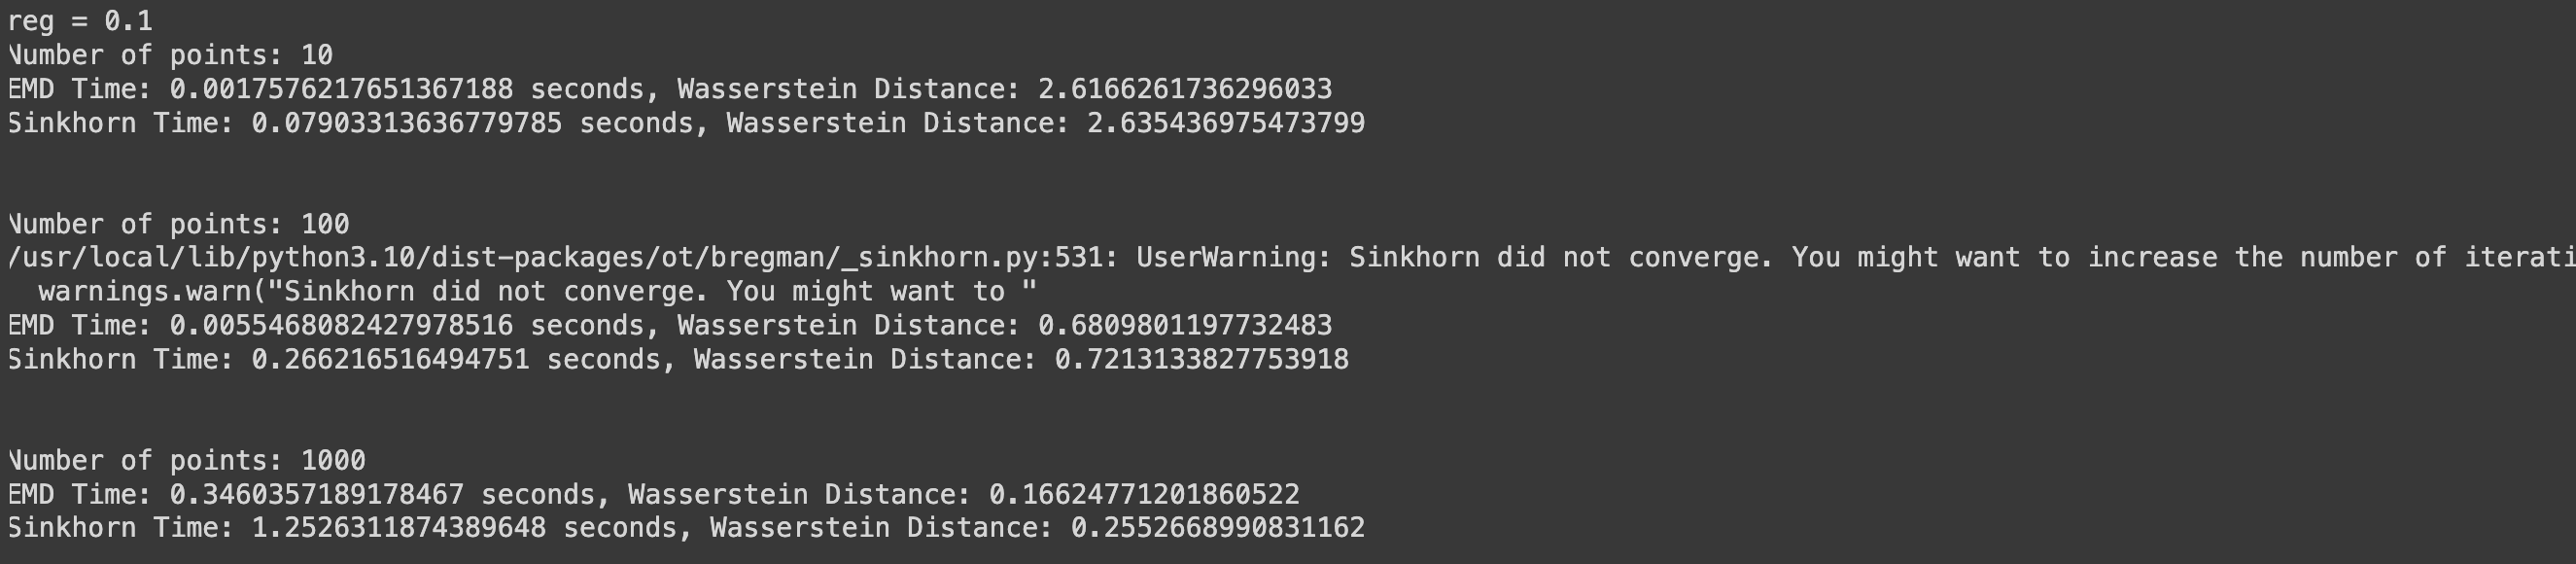

- make 2 plots
- x-axis to be the number of points in a point cloud
- y-axis: time to solve the assignments, EMD distance for that assignment
- one line per regularization parameter
- seaborn.lineplot might do the trick, but you would have to collect all of your data into one dataframe first

   number of points  EMD time
0                10  0.007471
1               100  0.004479
2               250  0.009967
3               500  0.053648
4               750  0.135213
5              1000  0.262529


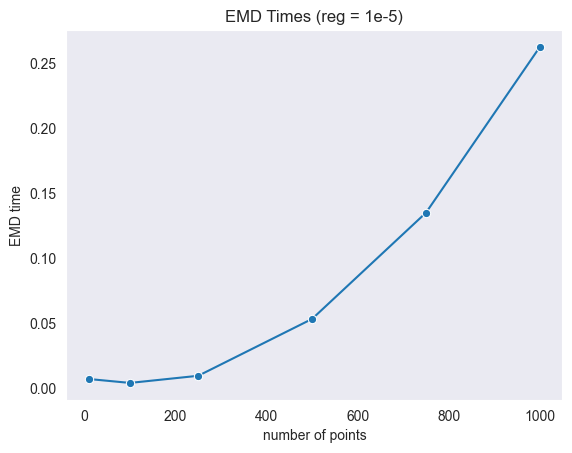

In [60]:
import seaborn as sns
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For displaying the plot


data = {
  "number of points": n_values,
  "EMD time": emd_times
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df)

sns.lineplot(x = "number of points", y = "EMD time", marker = "o", data=df)
plt.title("EMD Times (reg = 1e-5)")
plt.show()

   number of points  EMD time  Sinkhorn time
0                10  0.007471       0.002312
1               100  0.004479       0.011548
2               250  0.009967       0.002124
3               500  0.053648       0.023807
4               750  0.135213       0.068180
5              1000  0.262529       0.034761


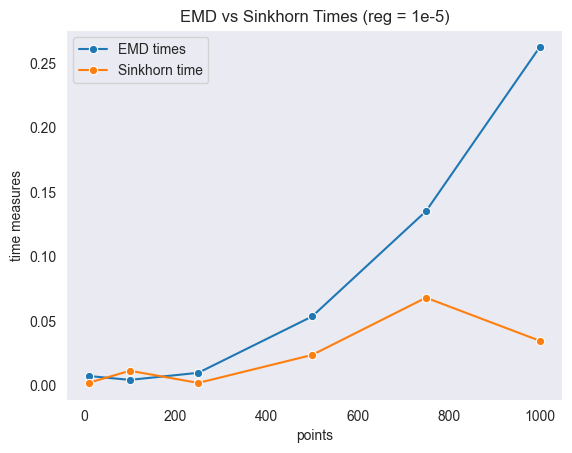

   number of points  EMD distance
0                10      1.754340
1               100      0.585467
2               250      0.283288
3               500      0.245366
4               750      0.172198
5              1000      0.163743


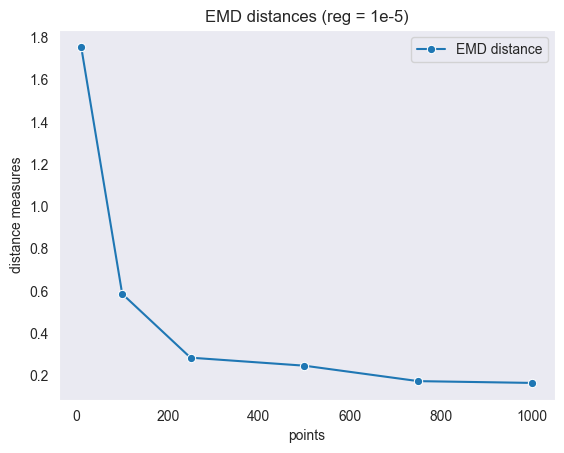

In [72]:
import seaborn as sns
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For displaying the plot

data = {
  "number of points": n_values,
  "EMD time": emd_times,
  "Sinkhorn time": sinkhorn_times
}

data2 = {
  "number of points": n_values,
  "EMD distance":emd_distance
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
print(df)

sns.lineplot(x='number of points', y='EMD time', data=df, label='EMD times', marker = "o")
sns.lineplot(x='number of points', y='Sinkhorn time', data=df, label='Sinkhorn time', marker = "o")
plt.title("EMD vs Sinkhorn Times (reg = 1e-5)")
plt.xlabel('points')
plt.ylabel('time measures')
plt.show()

df2 = pd.DataFrame(data2)
print(df2)

sns.lineplot(x='number of points', y='EMD distance', data=df2, label='EMD distance', marker = "o")
plt.title("EMD distances (reg = 1e-5)")
plt.xlabel('points')
plt.ylabel('distance measures')
plt.show()